# Tutorial 4

### AIMS: 
Simple Artificial neural network technique applied on classification of exoplanets using
programs by Data analyst Nagesh Singh Chauhan

### Tasks:
• use the same reporistory as in Tutorial 3

• go to exoplanet_ANN.py and try to make ipynb of it, also take a look at article linked in repo
which may help; the aim is that you understand each line of the code, make printing of
intermediate results, and if unknown command is encountered than to go to the online sources
to understand its meaning

• could you make some innovations in the ipynb such us new functions, plots, import other data
etc...

In [1]:
# converted .py to .ipynb using following code:
# jupytext --to notebook exoplanet_ANN.py 

In [1]:
"""
Created on Mon Dec  2 18:02:30 2019

@author: nageshsinghchauhan
"""
import os
import warnings
import math
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from sklearn.metrics import mean_squared_error, mean_absolute_error
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn.metrics import recall_score, classification_report, precision_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, normalize
from scipy import ndimage
import seaborn as sns

In [3]:
# !pip uninstall scikit-learn --yes
# !pip uninstall imblearn --yes
# !pip install scikit-learn==1.2.2
# !pip install imblearn

In [2]:
test_data = pd.read_csv('archive/exoTest.csv').fillna(0)
train_data = pd.read_csv('archive/exoTrain.csv').fillna(0)

In [3]:
categ = {2: 1,1: 0}
train_data.LABEL = [categ[item] for item in train_data.LABEL]
test_data.LABEL = [categ[item] for item in test_data.LABEL]

In [4]:
#Reduce memory
def reduce_memory(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [5]:
test_data = reduce_memory(test_data)
train_data = reduce_memory(train_data)

Memory usage of dataframe is 13.91 MB
Memory usage after optimization is: 6.25 MB
Decreased by 55.1%
Memory usage of dataframe is 124.12 MB
Memory usage after optimization is: 62.04 MB
Decreased by 50.0%


In [8]:
#Visualization:
plt.figure(figsize=(6,4))
colors = ["0", "1"]
sns.countplot(data=train_data, palette=colors, label='LABEL')
plt.title('Class Distributions \n (0: Not Exoplanet || 1: Exoplanet)', fontsize=14)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7b881d094160> (for post_execute):


KeyboardInterrupt: 

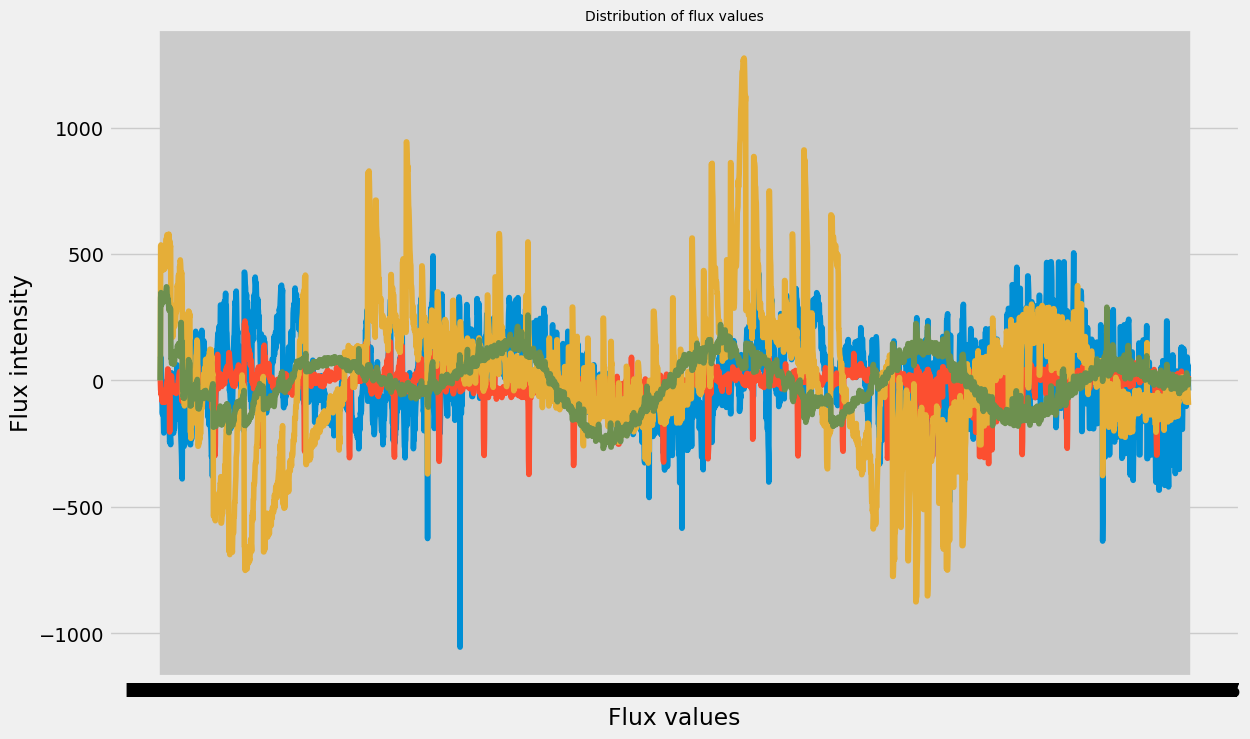

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 13, 8 
plt.title('Distribution of flux values', fontsize=10)
plt.xlabel('Flux values')
plt.ylabel('Flux intensity')
plt.plot(train_data.iloc[0,])
plt.plot(train_data.iloc[1,])
plt.plot(train_data.iloc[2,])
plt.plot(train_data.iloc[3,])
plt.show()

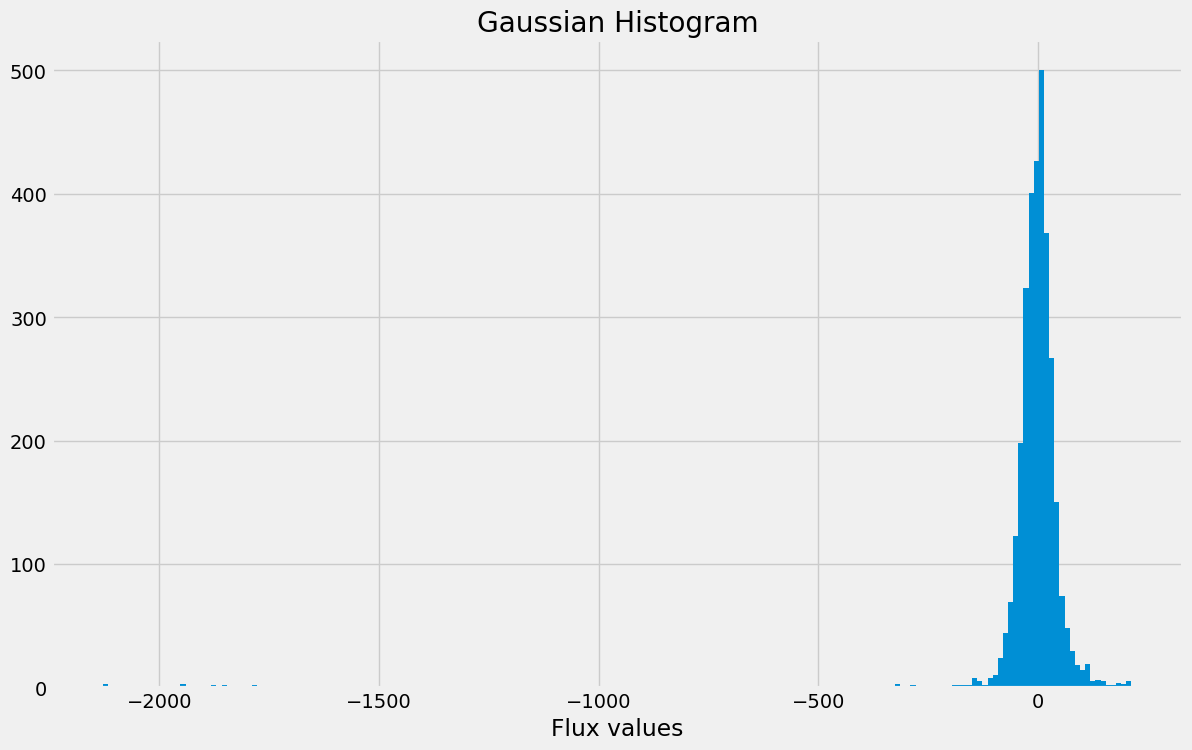

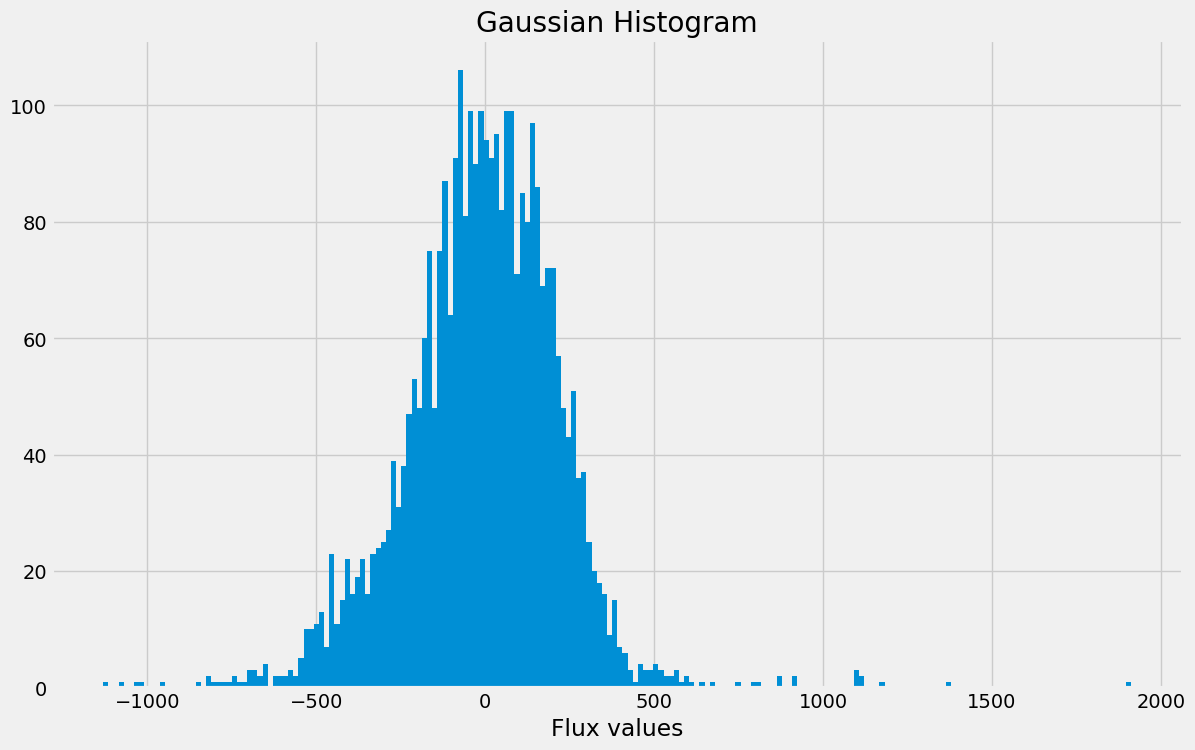

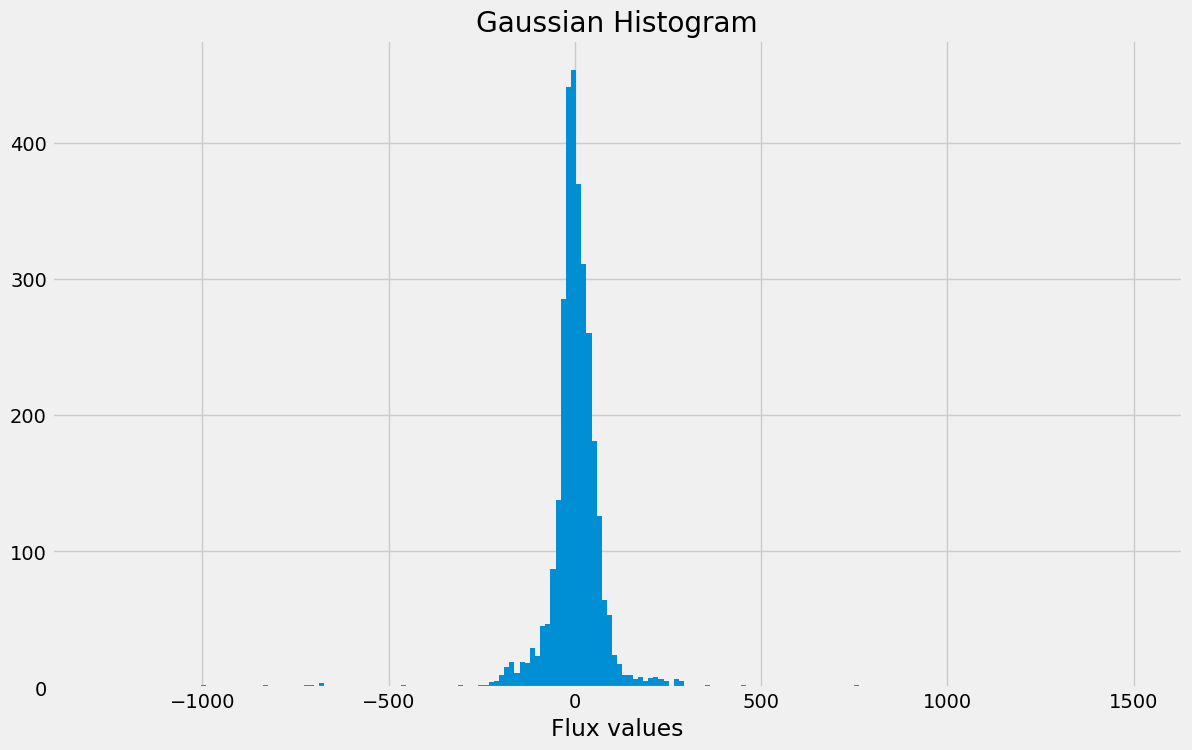

In [10]:
#Gaussian histogram of no exoplanets
labels_1=[100,200,300]
for i in labels_1:
    plt.hist(train_data.iloc[i,:], bins=200)
    plt.title("Gaussian Histogram")
    plt.xlabel("Flux values")
    plt.show()

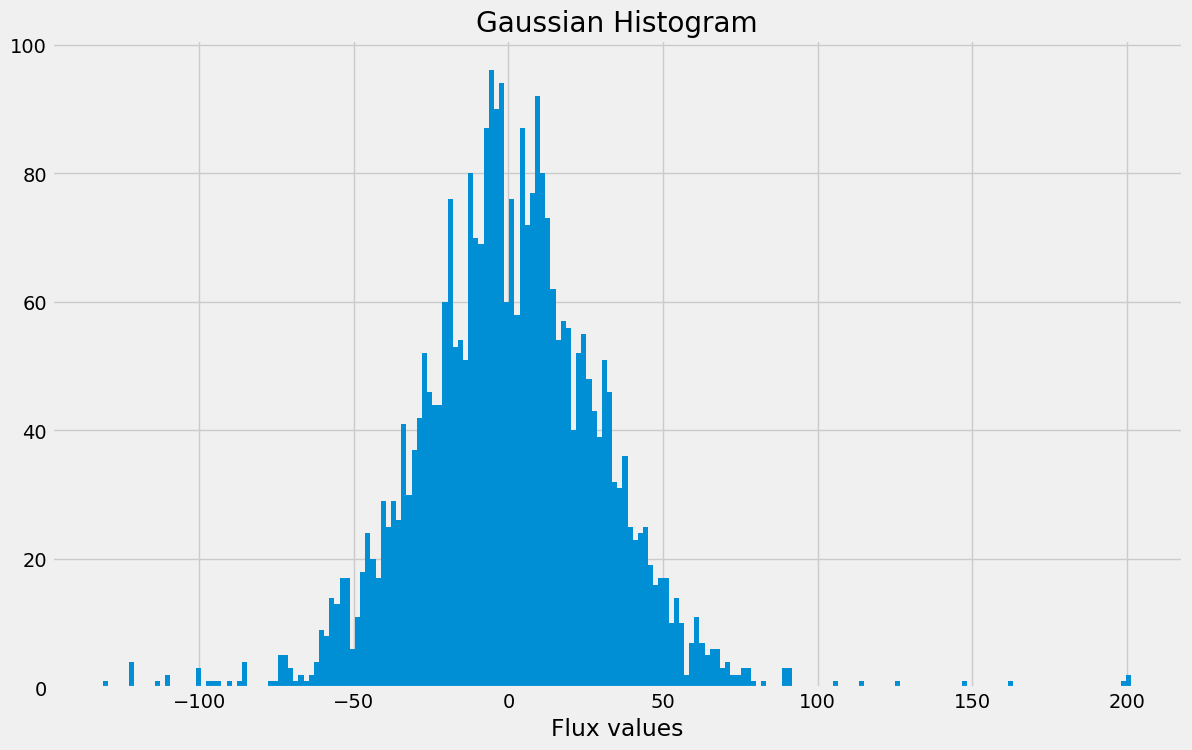

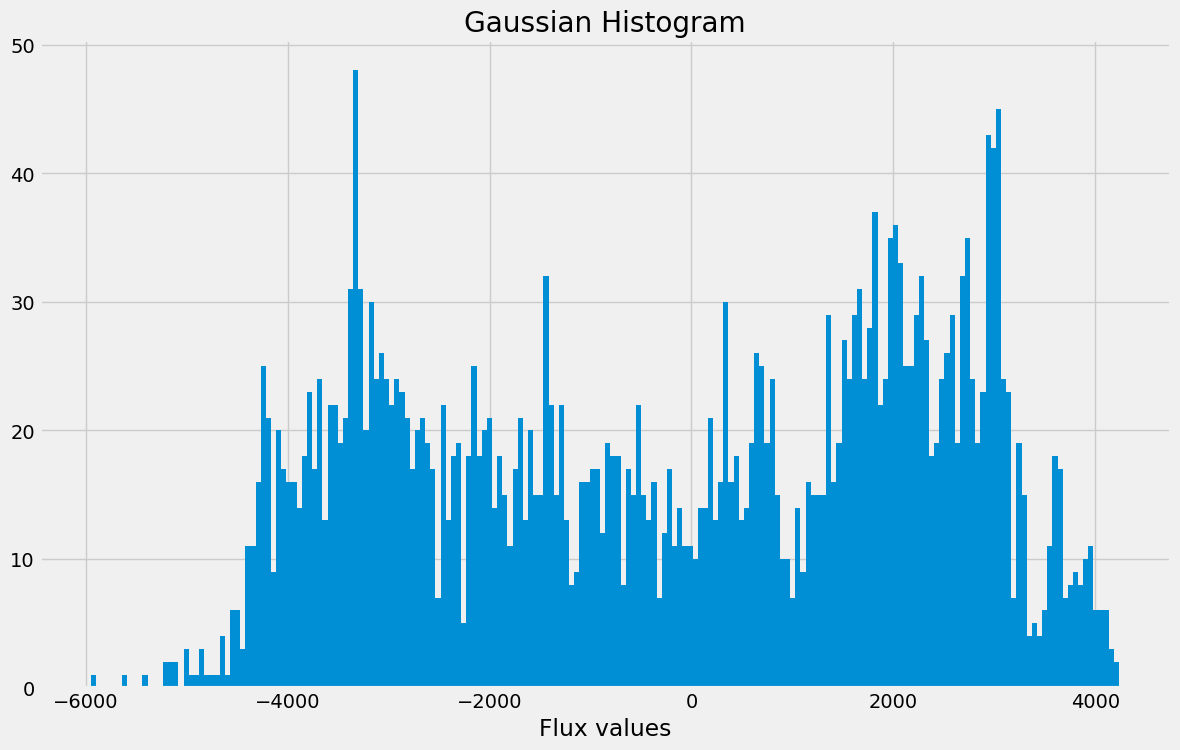

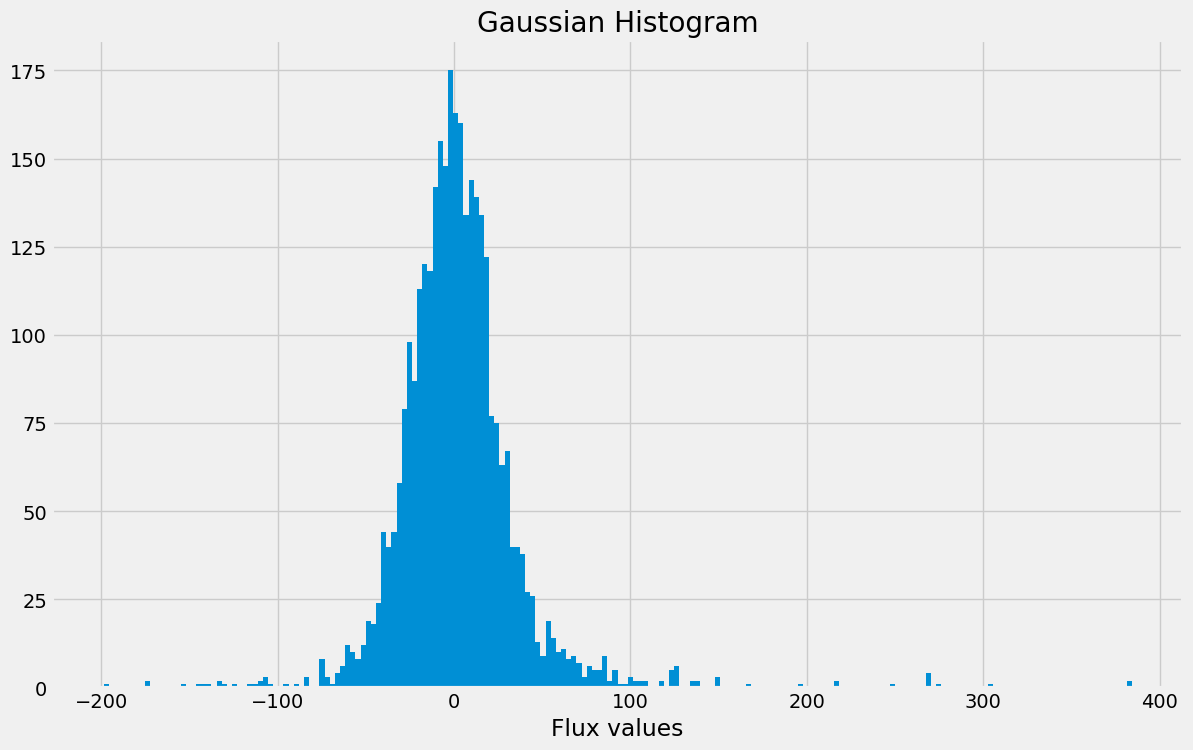

In [11]:
#Gaussian histogram of exoplanets
labels_1=[16,21,25]
for i in labels_1:
    plt.hist(train_data.iloc[i,:], bins=200)
    plt.title("Gaussian Histogram")
    plt.xlabel("Flux values")
    plt.show()

In [6]:
#splitting the data
x_train = train_data.drop(["LABEL"],axis=1)
y_train = train_data["LABEL"]   
x_test = test_data.drop(["LABEL"],axis=1)
y_test = test_data["LABEL"]

In [7]:
#Normalizing the data
x_train = normalized = normalize(x_train)
x_test = normalize(x_test)

In [8]:
#Applying of gaussian filter
x_train = filtered = ndimage.filters.gaussian_filter(x_train, sigma=10)
x_test = ndimage.filters.gaussian_filter(x_test, sigma=10)

In [9]:
#Feature scaling
std_scaler = StandardScaler()
x_train = scaled = std_scaler.fit_transform(x_train)
x_test = std_scaler.fit_transform(x_test)

In [10]:
#Dimentioanlity reduction
from sklearn.decomposition import PCA
pca = PCA() 
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
total=sum(pca.explained_variance_)
k=0
current_variance=0
while current_variance/total < 0.90:
    current_variance += pca.explained_variance_[k]
    k=k+1

In [11]:
k

37

This plot tells us that selecting 35 components we can preserve something around 98.8% or 99% 
of the total variance of the data. It makes sense, we’ll not use 100% of our variance,
because it denotes all components, and we want only the principal ones.

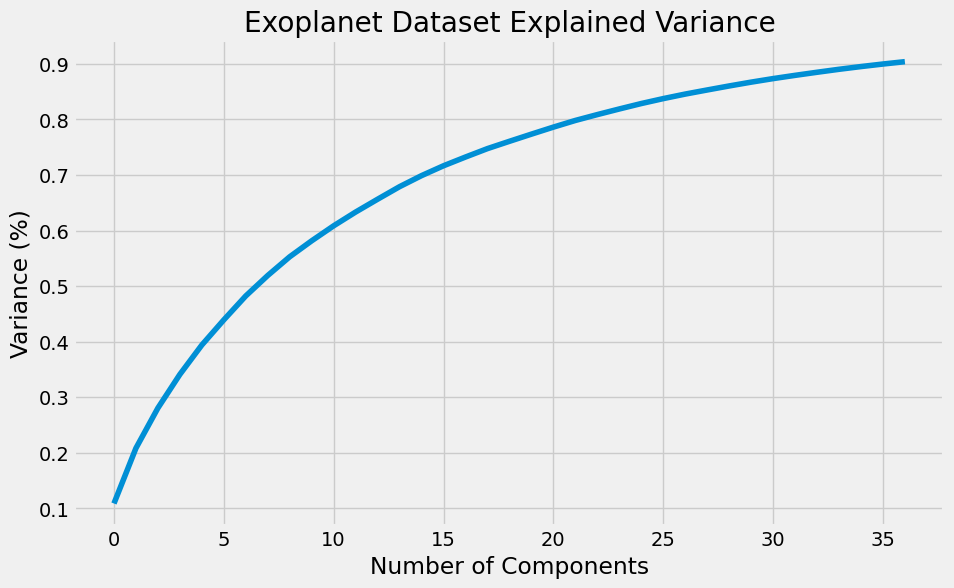

In [12]:
#Apply PCA with n_componenets
pca = PCA(n_components=37)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Exoplanet Dataset Explained Variance')
plt.show()

RangeIndex(start=0, stop=37, step=1)

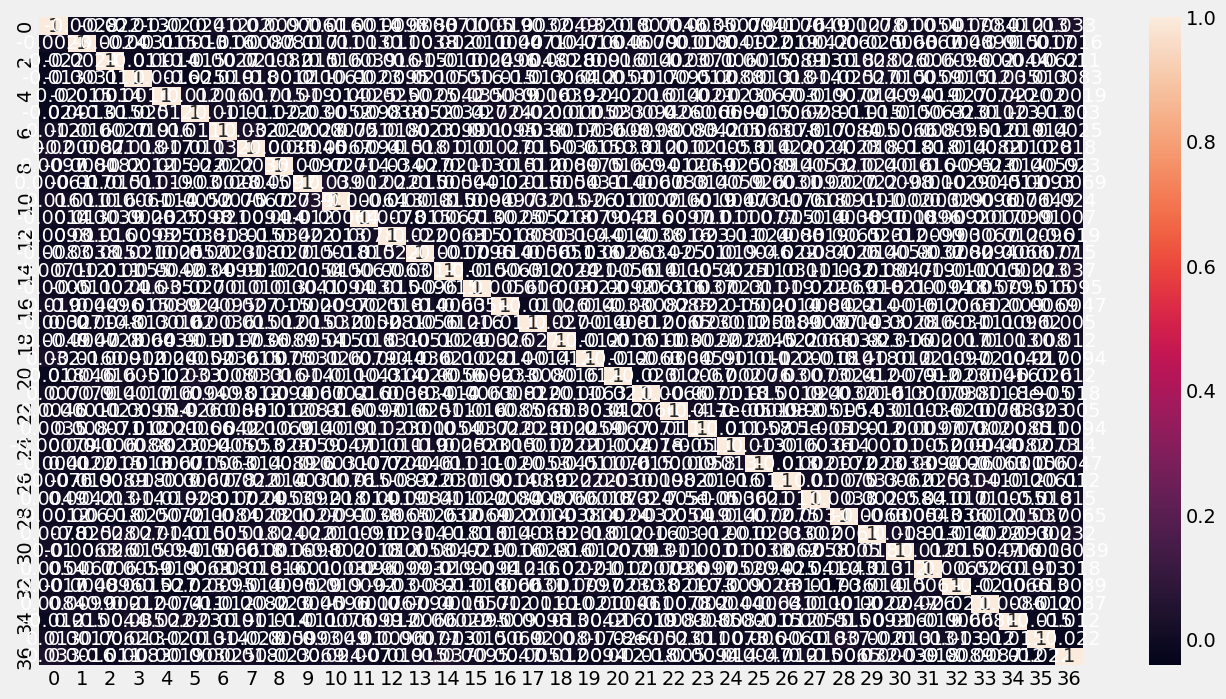

In [13]:
df = pd.DataFrame.from_records(x_train)     
corr = df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df.columns

In [14]:
#Resampling as the data is highly unbalanced.
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 37
Before OverSampling, counts of label '0': 5050 



In [15]:
sm = SMOTE(random_state=27)#, ratio = 1.0)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel()) 

In [16]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, counts of label '1': 5050
After OverSampling, counts of label '0': 5050


In [17]:
# !pip install scikeras

from scikeras.wrappers import KerasClassifier

2024-05-23 22:25:00.954597: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-23 22:25:00.970157: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-23 22:25:01.124847: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-23 22:25:04.138307: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [19]:
#Artificial Neural Network
import tensorflow
tensorflow.random.set_seed(101)
from sklearn.model_selection import cross_val_score
#from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
from keras import optimizers
def build_classifier():
#     optimizer = optimizers.Adam(clipvalue=0.5)
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train_res.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

## Before SMOTE

In [28]:
classifier = KerasClassifier(build_fn = build_classifier, epochs = 40)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5, n_jobs = -1)
mean = accuracies.mean()
variance = accuracies.std()

2024-05-23 18:09:12.677079: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-23 18:09:12.696836: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-23 18:09:12.723373: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-23 18:09:12.740322: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-23 18:09:12.743432: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-23 18:09:12.758676: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-23 18:09:12.898476: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not b

Epoch 1/40
Epoch 1/40
Epoch 1/40


/home/meghana/miniconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
Epoch 1/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9482 - loss: 0.6529
Epoch 2/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9895 - loss: 0.6342
Epoch 2/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9892 - loss: 0.6499
Epoch 2/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9095 - loss: 0.6673 
Epoch 2/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9936 - loss: 0.1773
 43/128 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9806 - loss: 0.6837Epoch 3/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9933 - loss: 0.1575
Epoch 3/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9940 - loss: 0.2042
Epoch 3/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9932 - loss: 0.2753
Epoch 3/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9881 - loss: 0.6437
 26/128 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9959 - loss: 0.0546Epoch 2/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.

128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9925 - loss: 0.0085e-
Epoch 11/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9933 - loss: 0.0064
 33/128 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9866 - loss: 0.0140Epoch 13/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9937 - loss: 0.0066   
Epoch 13/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9951 - loss: 0.0057
 92/128 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9902 - loss: 0.0103Epoch 13/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9912 - loss: 0.0094     
Epoch 12/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9919 - loss: 0.0081
 96/128 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9934 - loss: 0.0061Epoch 13/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9931 - loss: 0.0063   
 26/128 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9945 - loss: 0.0059Epoch 14/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9922 - loss: 0.0078     
 3

128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9934 - loss: 0.0057 
124/128 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9912 - loss: 0.0068Epoch 22/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9912 - loss: 0.0067
101/128 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9952 - loss: 0.0036Epoch 24/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9929 - loss: 0.0053
  1/128 ━━━━━━━━━━━━━━━━━━━━ 15s 126ms/step - accuracy: 1.0000 - loss: 5.0024e-05Epoch 25/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9948 - loss: 0.0039     
 49/128 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9891 - loss: 0.0104Epoch 23/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9903 - loss: 0.0085 
Epoch 24/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9938 - loss: 0.0047     
Epoch 25/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9910 - loss: 0.0073
Epoch 23/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9935 - loss: 0.0048
 

128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9999 - loss: 0.0037
105/128 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0054Epoch 35/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0053     
Epoch 33/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0056e-04
 84/128 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0040Epoch 33/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0042     
Epoch 33/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0063
 55/128 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0099Epoch 36/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 0.0054   
Epoch 34/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9999 - loss: 0.0036 
Epoch 34/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 0.00713 04
 29/128 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.00

In [30]:
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Accuracy mean: 0.8897104817319711
Accuracy variance: 0.022067697380114847


## After SMOTE

In [20]:
classifier = KerasClassifier(build_fn = build_classifier, epochs = 40)
accuracies = cross_val_score(estimator = classifier, X = x_train_res, y = y_train_res, cv = 5, n_jobs = -1)
mean = accuracies.mean()
variance = accuracies.std()

2024-05-23 22:25:55.730227: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-23 22:25:55.744322: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-23 22:25:55.945090: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-23 22:25:56.062397: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-23 22:25:56.082004: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-23 22:25:56.163979: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your

Epoch 1/40


/home/meghana/miniconda3/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/meghana/miniconda3/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/meghana/miniconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/meghana/miniconda3/lib/python3.10/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future rele

Epoch 1/40
Epoch 1/40
Epoch 1/40
Epoch 1/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8137 - loss: 0.5940
201/253 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7606 - loss: 0.6288Epoch 2/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.6466 - loss: 0.6050
238/253 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7744 - loss: 0.6084Epoch 2/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.7798 - loss: 0.6001
Epoch 2/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.7883 - loss: 0.6167
Epoch 2/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7168 - loss: 0.5990
 91/253 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9800 - loss: 0.1009Epoch 2/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9865 - loss: 0.0785
Epoch 3/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9819 - loss: 0.2556
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9906 - loss: 0.0661
Epoch 3/40
Epoch 3/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/

253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 1.0000 - loss: 2.2765e-04
140/253 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9997 - loss: 0.0048Epoch 13/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9998 - loss: 0.0012e-0
148/253 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9997 - loss: 0.0048Epoch 11/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9998 - loss: 0.0046e-
Epoch 13/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 1.0000 - loss: 4.1574e-04
Epoch 12/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9998 - loss: 8.3032e-04
Epoch 13/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9999 - loss: 1.9359e-04
Epoch 14/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9998 - loss: 9.6625e-04
Epoch 12/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9999 - loss: 0.0034e-
Epoch 14/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 1.0000 - loss: 3.3627e-04
Epoch 13/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/st

253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 1.0000 - loss: 6.9227e-05
232/253 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9999 - loss: 1.9509e-04Epoch 22/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9998 - loss: 7.9776e-04
Epoch 23/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9999 - loss: 2.0373e-04
Epoch 20/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 1.0000 - loss: 5.4665e-05
Epoch 22/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 1.0000 - loss: 9.0357e-05
Epoch 23/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 1.0000 - loss: 4.2578e-05
Epoch 23/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9998 - loss: 6.8832e-04
Epoch 24/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9999 - loss: 1.8100e-04
Epoch 21/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 1.0000 - loss: 1.8541e-05
248/253 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 3.1544e-05Epoch 24/40
253/253 ━━━━━━━━━━━━━━━━━

253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 1.0000 - loss: 6.5644e-06
120/253 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 2.0170e-04Epoch 31/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9997 - loss: 0.0019e--
Epoch 32/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 1.0000 - loss: 1.8799e-04
Epoch 33/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 1.0000 - loss: 4.7139e-05
 54/253 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 1.7211e-04Epoch 30/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 1.0000 - loss: 2.7991e-05
 98/253 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 1.8799e-04Epoch 33/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 1.0000 - loss: 5.8797e-06
Epoch 32/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9996 - loss: 0.0019e-
 67/253 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 1.2805e-04Epoch 33/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 1

64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/stepep - accuracy: 1.0000 - loss: 2.9658e-
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/stepep - accuracy: 1.0000 - loss: 2.2549e-
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 1.2250e-04
Epoch 40/40
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 3.3456e-05
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [21]:
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Accuracy mean: 0.9576237623762378
Accuracy variance: 0.024430780843884142


Accuracy mean: 0.7791307791307792
Accuracy variance: 0.26064381617895693

In [22]:
classifier.fit(x_train_res,y_train_res);

Epoch 1/40
316/316 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8023 - loss: 0.5563
Epoch 2/40
316/316 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9994 - loss: 0.0245
Epoch 3/40
316/316 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9997 - loss: 0.0049
Epoch 4/40
316/316 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9998 - loss: 0.0024
Epoch 5/40
316/316 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9998 - loss: 0.0015
Epoch 6/40
316/316 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9998 - loss: 9.9690e-04
Epoch 7/40
316/316 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9998 - loss: 6.3760e-04
Epoch 8/40
316/316 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 4.6750e-04
Epoch 9/40
316/316 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 3.5483e-04
Epoch 10/40
316/316 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 2.8048e-04
Epoch 11/40
316/316 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 2.3016e-04
Epoch 12/40
316/316 ━━━━━━━━

In [23]:
y_pred = classifier.predict(x_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
accuracy_score(y_test,y_pred)

0.9421052631578948

In [31]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [41]:
# plt.style.reload_library()
cm = confusion_matrix(y_test, y_pred)
cm = ConfusionMatrixDisplay(confusion_matrix=cm)
cm.plot()

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[[537  28]
 [  5   0]]


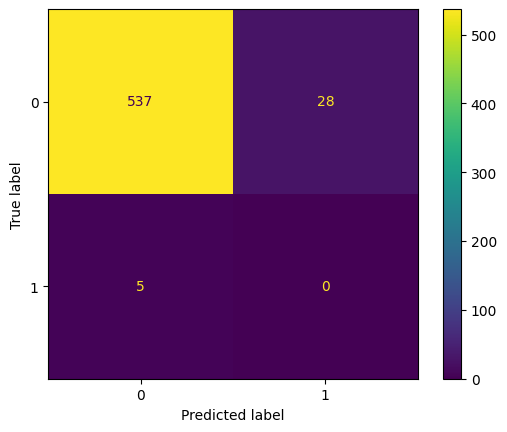

In [46]:
disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        x_test,
        y_test
#         display_labels=class_names,
#         cmap=plt.cm.Blues,
#         normalize=normalize,
    )
#     disp.ax_.set_title(title)

#     print(title)
print(disp.confusion_matrix)

plt.show()